In [1]:
import h5py as h5
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import seaborn as sns
import legwork

import sys
sys.path.append("../src/")
from variations import variations
from galaxy import simulate_mw

%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='serif')
fs = 20

params = {'legend.fontsize': fs,
         'axes.labelsize': fs,
         'xtick.labelsize':0.7*fs,
         'ytick.labelsize':0.7*fs}
plt.rcParams.update(params)

In [2]:
dco_colours = {"BHBH": plt.get_cmap("plasma")(0.2), 
               "BHNS": plt.get_cmap("plasma")(0.5),
               "NSNS": plt.get_cmap("plasma")(0.8)}

dco_types = ["BHBH", "BHNS", "NSNS"]
sim_folder = "../data/simulation_plus_channels/"

total_DCOs_in_MW = np.load("../data/total_DCO_in_MW.npy")
total_bound_DCOs_in_MW = np.load("../data/total_DCO_in_MW_nohubble.npy")

detections = np.load("../data/detections_4yr.npy")
detections_10yr = np.load("../data/detections_10yr.npy")

In [3]:
def kdeplot_by_channel(variable, dco_type_list=["BHBH", "BHNS", "NSNS"], channels=[0, 1, 2, 3, 4], variation_index=0, show=True, fig=None, ax=None, **kwargs):
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, figsize=(10, 5))

    for dco_type in dco_type_list:
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[variation_index]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = np.logical_and(full_data["snr"] > 7, np.isin(full_data["channel"], channels))

            data = full_data[mask]
            print(len(data))

        sns.kdeplot(data[variable], weights=data["weight"], color=dco_colours[dco_type], cut=0, **kwargs, ax=ax)

    if show:
        print("yo")
        plt.show()
    return fig, ax

8076
0
0
10104
yo


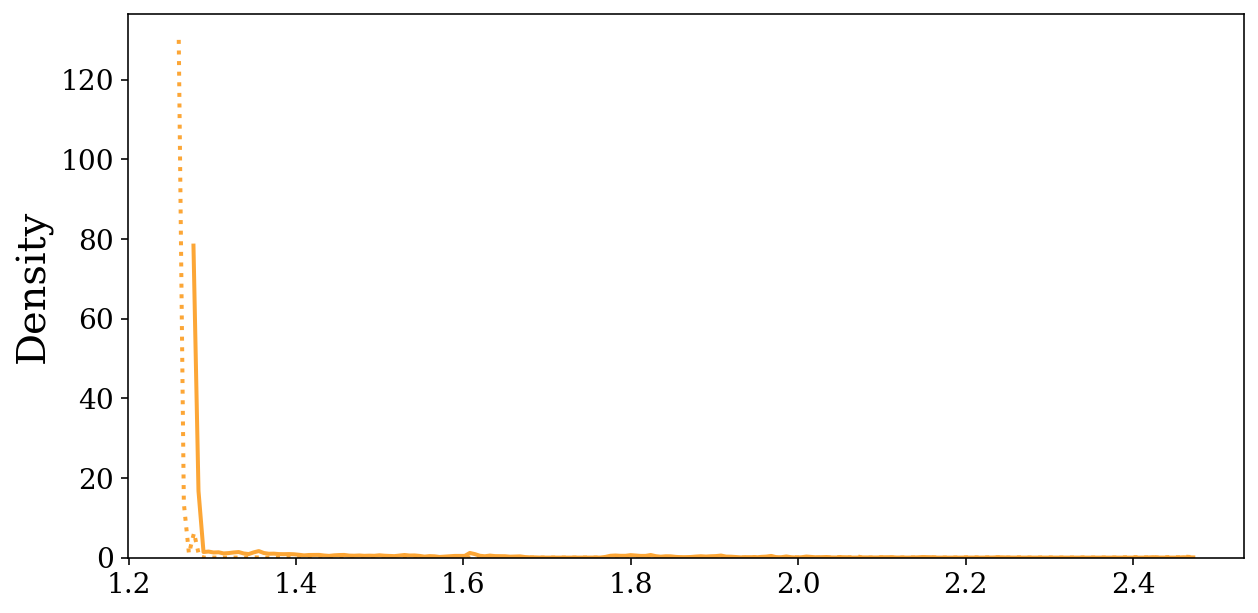

In [4]:
fig, ax = None, None
var = "m_1"
dco_list = ["NSNS"]
bw_adjust = 0.1
# fig, ax = kdeplot_by_channel("e_LISA", log_scale=(True, False), bw_adjust=0.5, lw=4, show=False)
fig, ax = kdeplot_by_channel(var, dco_type_list=dco_list, log_scale=(False, False), bw_adjust=bw_adjust, linestyle="dotted", lw=2, channels=[1], fig=fig, ax=ax, show=False)
fig, ax = kdeplot_by_channel(var, dco_type_list=dco_list, log_scale=(False, False), bw_adjust=bw_adjust, linestyle="--", lw=2, channels=[2], fig=fig, ax=ax, show=False)
fig, ax = kdeplot_by_channel(var, dco_type_list=dco_list, log_scale=(False, False), bw_adjust=bw_adjust, linestyle="-.", lw=2, channels=[3], fig=fig, ax=ax, show=False)
fig, ax = kdeplot_by_channel(var, dco_type_list=dco_list, log_scale=(False, False), bw_adjust=bw_adjust, linestyle="-", lw=2, channels=[4], fig=fig, ax=ax)

In [5]:
channel_colours = ["#808080", "#118ab2", "#ef476f", "#ffd166", "#073b4c"]
channel_labels = ["Other", "Classic", "Only stable", "single core CEE", "double core CEE"]

In [6]:
with h5.File(sim_folder + "{}_{}_all.h5".format("BHNS", "fiducial"), "r") as f:
    full_data = f["simulation"][...].squeeze()
    mask = full_data["snr"] > 7

    data = full_data[mask]
#     _, places = np.unique(data["seed"], return_index=True)
#     data = data[places]
    
mBH = np.maximum(data["m_1"], data["m_2"])
mNS = np.minimum(data["m_1"], data["m_2"])

t_merge = legwork.evol.get_t_merge_ecc(ecc_i=data["e_DCO"], a_i=data["a_DCO"] * u.AU,
                                          m_1=data["m_1"] * u.Msun, m_2=data["m_2"] * u.Msun).to(u.Gyr)

0 71
1 20078
2 2441
3 129
4 17


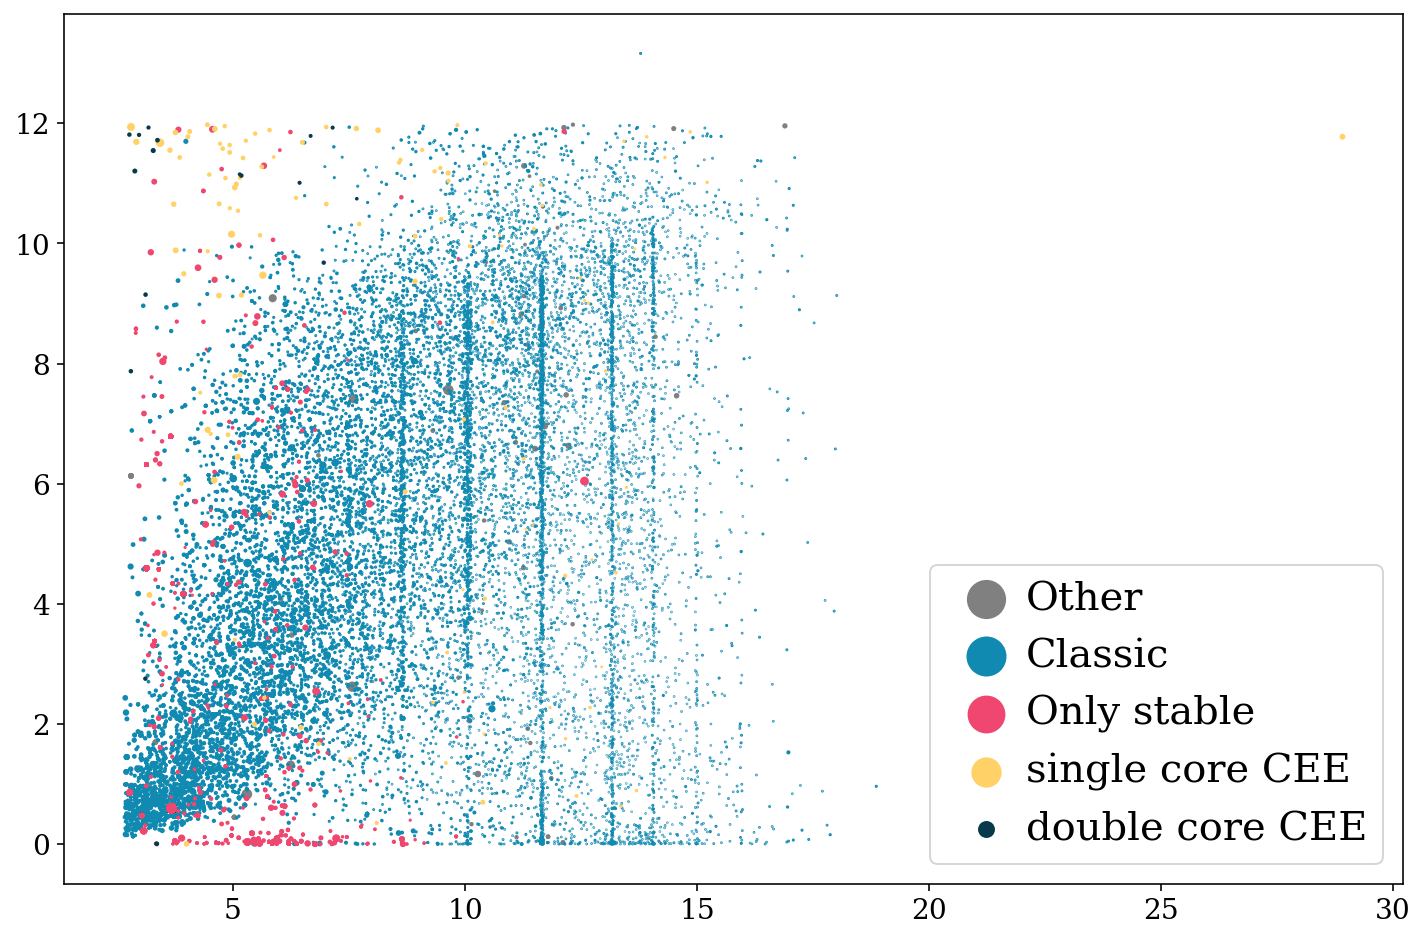

In [7]:
fig, ax = plt.subplots()
for channel in range(len(channel_colours)):

    ch_mask = data["channel"] == channel
    print(channel, len(mBH[ch_mask] / len(mBH)))
        
    ax.scatter(mBH[ch_mask], t_merge.value[ch_mask], s=25 * data["weight"][ch_mask], color=channel_colours[channel], label=channel_labels[channel])
    
# ax.set_xscale("log")
# ax.set_yscale("log")

ax.legend(markerscale=6, handletextpad=0)

plt.show()

0 71
1 20078
2 2441
3 129
4 17


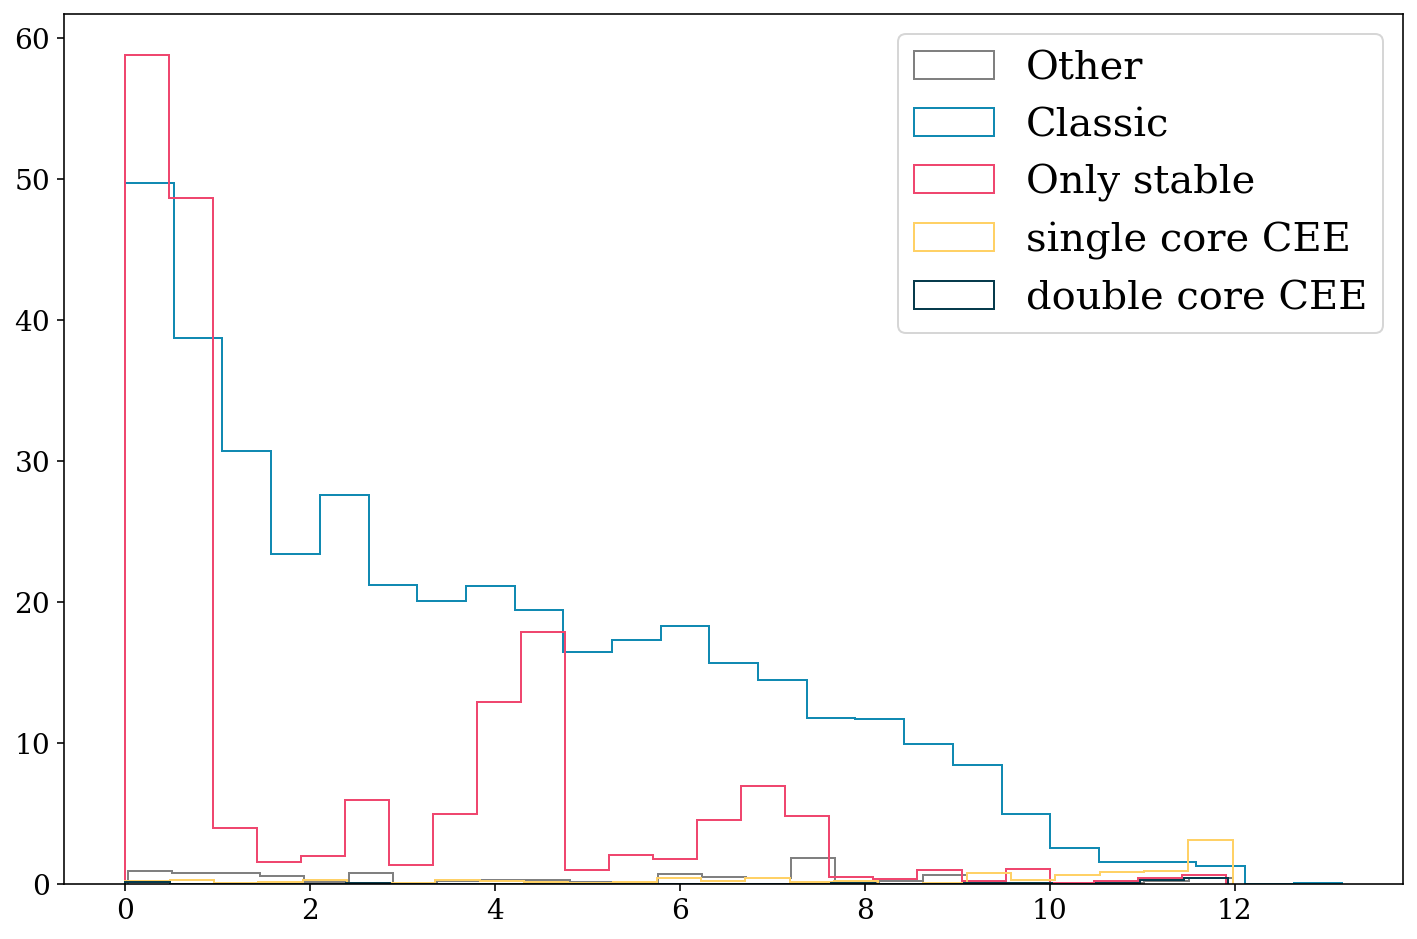

In [8]:
fig, ax = plt.subplots()
for channel in range(len(channel_colours)):

    ch_mask = data["channel"] == channel
    print(channel, len(mBH[ch_mask] / len(mBH)))
        
    ax.hist(t_merge.value[ch_mask], bins=25, weights=data["weight"][ch_mask],
            color=channel_colours[channel], label=channel_labels[channel], histtype="step")
    
# ax.set_xscale("log")
# ax.set_yscale("log")

ax.legend(markerscale=6)

plt.show()

No handles with labels found to put in legend.


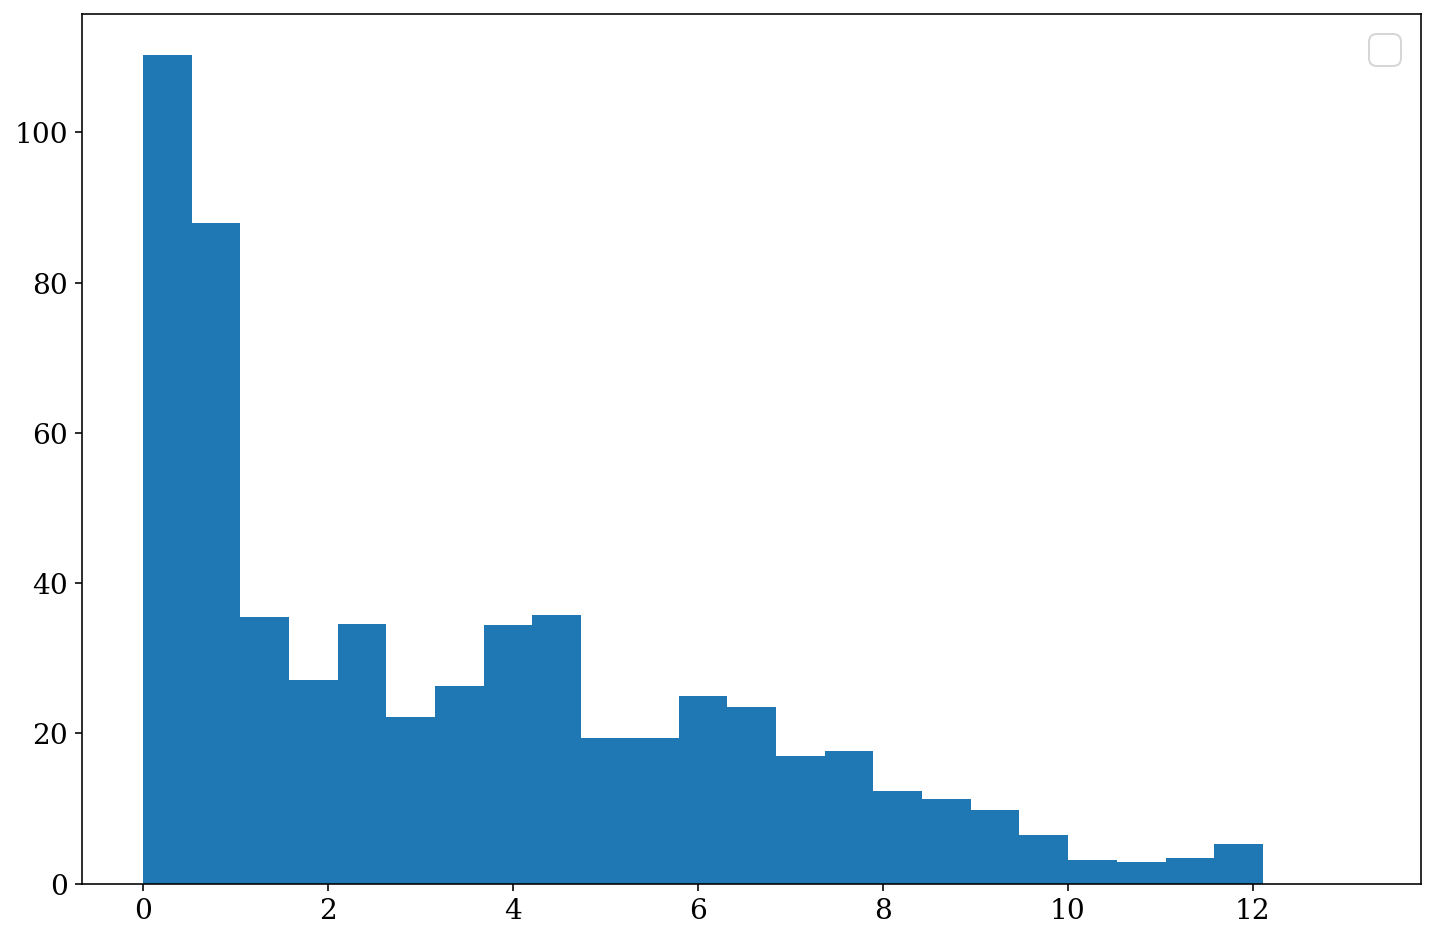

In [9]:
fig, ax = plt.subplots()
        
ax.hist(t_merge.value, bins=25, weights=data["weight"])
    
# ax.set_xscale("log")
# ax.set_yscale("log")

ax.legend(markerscale=6)

plt.show()